# TSIA202a - Second Practice Session : Spectral density estimation and periodogram
The goal of this second session is to provide a power spectral density estimator of a real, zero-mean, weakly stationary process $X_t$. We suppose that we have access to $n$ observations and we will use the FFT algorithm (that implements the DFT) using `numpy.fft.module`.
Recall (from the course) that the periodogram of the observations $X_0, \dots, X_{n-1}$ can be given as:
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2
$$

Moreover, the Hertglotz theorem provides a relation between the empirical autocovariance $\hat{\gamma}_n$ and the periodogram $I_n$:
$$
\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda
$$

1. For a given $m \geq n$  we denote also the DFT as:
$$
DFT(X,m)(k) = \sum_{h=0}^{n-1}X_he^{-2i\pi\frac{kh}{m}}
$$
Show the following relation: 
$$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$





**Answer:**
<br>we know that
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2
$$
if we replace  $\lambda$ with $\frac{2\pi k}{m}$ we find that $I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |\sum_{h=0}^{n-1} X_h e^{i \frac{2\pi hk}{m}}|^2 $
<br>Thus: $$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$


2. provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session


**Answer:**

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#Defining the factors of the random variables
n = 50
K = 100
mean = 0
sigma = 1
a = 1
b = 1
A0 = 1
lambda0 = 1
indexes = np.arange(n)

In [25]:
#This here is the white noise variable, defined in the first session TP
def white_nosie(number_var):
    return np.random.normal(mean,sigma, number_var)

##This here is the second random Variable, defined in the first session TP
##X_t = a +bZ_t-1 + Z_t
def sum_white_noise(number_variable):
    X = white_nosie(number_variable)
    X_1 = white_nosie(number_var=1)
    X_rounded = np.roll(X,1)
    X_rounded = a + b*X + X_rounded
    X_rounded[0] = a + b*X[0] + X_1[0]  
    return X_rounded

#This one computes the sum of the random variables multiplied by 2 to the power of the variable's indexc
def geometric_white_noise(number_variables):
    X = white_nosie(number_variables+K) # generate a white noise 
    summed_variables = np.zeros(number_variables) # generate array of zeros with the same size of random variable
    # Sum on all of the number of random varibales
    for j in range(number_variables):
        #This index is exactly the random variable defines in the last TP's question

        ##Fixed j => k and it should work now
        summed_variables[j] = np.sum(np.fromiter(((2**-k)*X[j-k+K] for k in range(K+1)),dtype=float))

    return summed_variables + a 

#This function defines the harmonic process in the exercise
def cos_noise(number_variables):
    T=np.arange(0,number_variables) # An array of the number of random variable
    PHI = np.random.uniform(0,2*np.pi)
    return A0*np.cos(lambda0*T+PHI)+np.random.normal(mean,sigma,number_variables) # returns the cos function


Since we should work with zero mean random variables the definition of I will be as follows:

In [26]:
def I(X, m):
    n=len(X)
    A=np.zeros(m)
    dft = np.fft.fft(X-np.mean(X), m)
    for k in range(m):
        A[k]=(1/(2*n*np.pi))*np.linalg.norm(dft[k])**2
    return A

In [27]:
#call the white noise function
X_WN = white_nosie(number_var=n)


#Let us call the sum random variable
X_sum_WN = sum_white_noise(number_variable=n)

#Let us call the geometric sum random variable
X_sum_geometric_WN = geometric_white_noise(number_variables=n)

#Let us call the harmonic process
X_cos_WN = cos_noise(number_variables=n)

We should not forget that $m \geq n$ :

In [28]:
m = 20 #m > n
print("The periodogram of WN \n", I(X_WN, m=m))
print("**************************************")
print("The periodogram of X_sum_WN \n", I(X_sum_WN, m=m))
print("**************************************")
print("The periodogram of X_sum_geometric_WN \n", I(X_sum_geometric_WN, m=m))
print("**************************************")
print("The periodogram of Harmonic process \n", I(X_cos_WN, m=m))
print("**************************************")

The periodogram of WN 
 [0.01081612 0.05037528 0.12214624 0.12408611 0.00250036 0.13681292
 0.02048142 0.09439542 0.07752755 0.150615   0.02795261 0.150615
 0.07752755 0.09439542 0.02048142 0.13681292 0.00250036 0.12408611
 0.12214624 0.05037528]
**************************************
The periodogram of X_sum_WN 
 [0.02122472 0.11883629 0.21094286 0.0769306  0.09640124 0.1175415
 0.09590641 0.0225881  0.01315321 0.0055784  0.00141068 0.0055784
 0.01315321 0.0225881  0.09590641 0.1175415  0.09640124 0.0769306
 0.21094286 0.11883629]
**************************************
The periodogram of X_sum_geometric_WN 
 [0.01431987 0.04663076 0.20698415 0.06266244 0.00839892 0.04802212
 0.23357522 0.00815262 0.09684885 0.0030684  0.0016144  0.0030684
 0.09684885 0.00815262 0.23357522 0.04802212 0.00839892 0.06266244
 0.20698415 0.04663076]
**************************************
The periodogram of Harmonic process 
 [0.00111455 0.03559865 0.01297694 0.29765473 0.1098322  0.12373904
 0.12173002 0.0

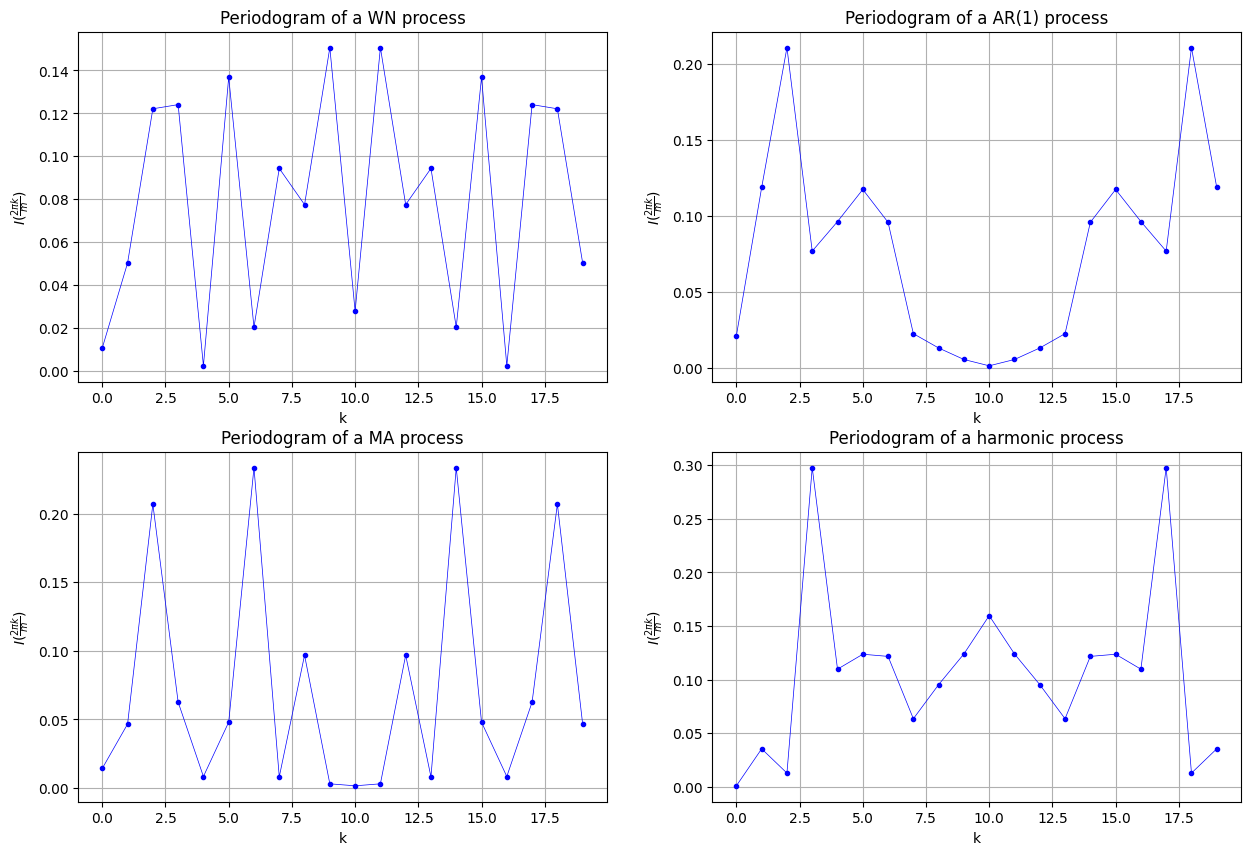

In [29]:
# Plotting the power spectrum for each signal
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


axes[0, 0].plot(I(X_WN, m=m), color='blue', linewidth=0.5, marker=".")
axes[0, 0].set_title('Periodogram of a WN process')
axes[0, 0].set_xlabel("k")
axes[0, 0].set_ylabel(r'$I(\frac{2 \pi k}{m})$')
axes[0, 0].grid()


axes[0, 1].plot(I(X_sum_WN, m=m), color='blue', linewidth=0.5, marker=".")
axes[0, 1].set_title('Periodogram of a AR(1) process')
axes[0, 1].set_xlabel("k")
axes[0, 1].set_ylabel(r'$I(\frac{2 \pi k}{m})$')
axes[0, 1].grid()


axes[1, 0].plot(I(X_sum_geometric_WN, m=m), color='blue',linewidth=0.5, marker=".")
axes[1, 0].set_title('Periodogram of a MA process')
axes[1, 0].set_xlabel("k")
axes[1, 0].set_ylabel(r'$I(\frac{2 \pi k}{m})$')
axes[1, 0].grid()


axes[1, 1].plot(I(X_cos_WN, m=m), color='blue', linewidth=0.5, marker=".")
axes[1, 1].set_title('Periodogram of a harmonic process')
axes[1, 1].set_xlabel("k")
axes[1, 1].set_ylabel(r'$I(\frac{2 \pi k}{m})$')
axes[1, 1].grid()
plt.show()

3. Show that $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$
4. How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$
Try this estimator on the autocovariance of previous time series of the first session.

**Answer:** 

we know that
$$
I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}
$$
Therefore if we replace $\lambda$ with $\frac{2\pi k}{m}$ we get the following expression : 
$$
  I_n\left(\frac{2 \pi k}{m}\right) = \frac{1}{2\pi} \sum_{l=0}^{n-1} \hat{\gamma}_n(l)e^{-2 i \pi \frac{k l}{m}}
$$

Which is a DFT expression. Thus, if we want to get back to the expression of $\hat{\gamma}_n(k)$ we need to use the IDFT.

But in order to use the IDFT we should have ${m = n}$.

In that case we have:
$$\hat{\gamma}_n(k) = IDFT({2\pi} I_n\left(\frac{2 \pi k}{n}\right),n)(k)$$

Since: 
$$I_n(\frac{2\pi k}{n}) = \frac{1}{2\pi n} |DFT(X,n)(k)|^2$$

We deduce that :

$$\hat{\gamma}_n(k) = IDFT({2\pi}\frac{1}{2\pi n} |DFT(X,n)(k)|^2,n)(k)$$

Therefore: 

$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, n)\right|^2, n\right)(k)
$$

In [30]:
def autocovariance_estimater(X, n):
    dft_x = np.fft.fft(X, n=n)
    module_squared = np.abs(dft_x) ** 2
    gamma = np.fft.ifft(module_squared, n=n)/n
    return gamma

In [31]:
#call the white noise function
X_WN = white_nosie(number_var=n)


#Let us call the sum random variable
X_sum_WN = sum_white_noise(number_variable=n)

#Let us call the geometric sum random variable
X_sum_geometric_WN = geometric_white_noise(number_variables=n)

#Let us call the harmonic process
X_cos_WN = cos_noise(number_variables=n)



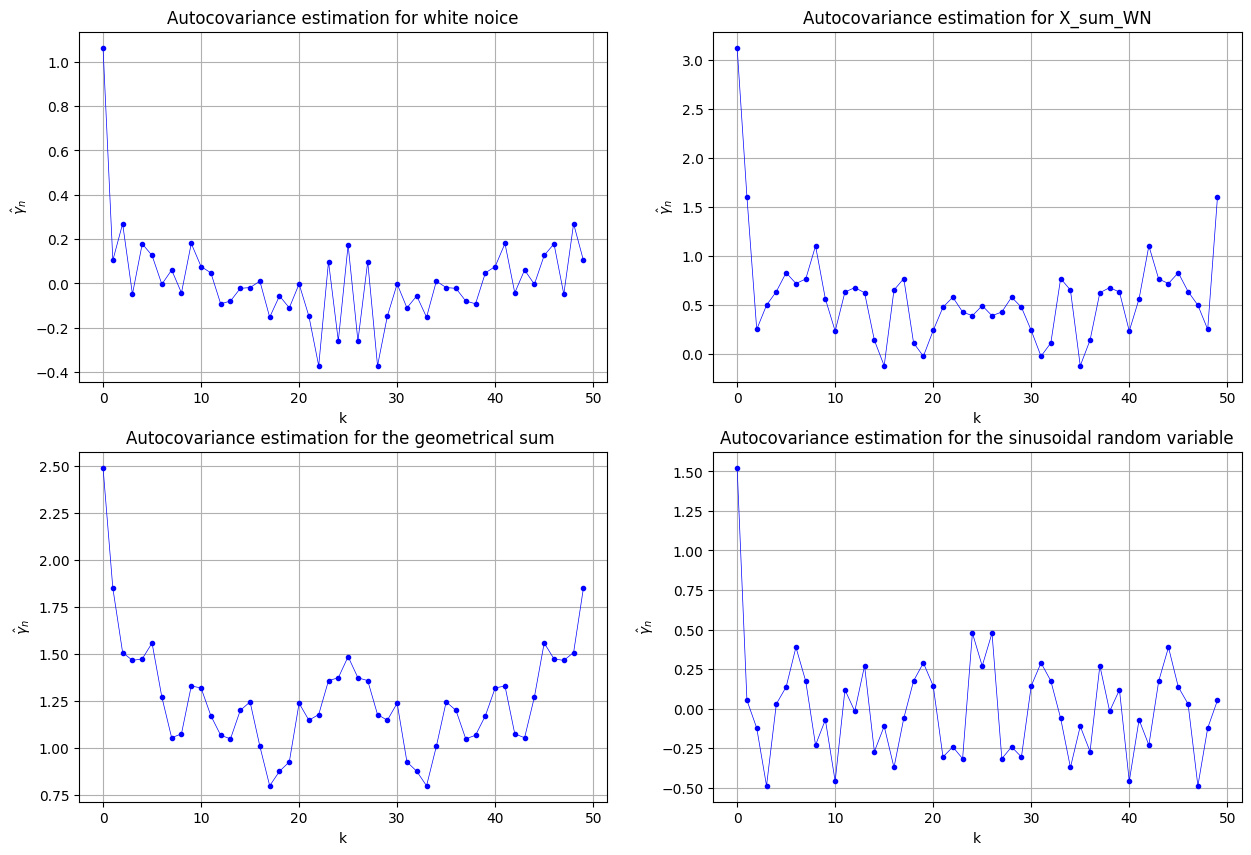

In [32]:
# Plotting the power spectrum for each signal
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


axes[0, 0].plot(autocovariance_estimater(X_WN, n=n), color='blue', linewidth=0.5, marker=".")
axes[0, 0].set_title('Autocovariance estimation for white noice')
axes[0, 0].set_xlabel("k")
axes[0, 0].set_ylabel(r'$\hat{\gamma}_n$')
axes[0, 0].grid()


axes[0, 1].plot(autocovariance_estimater(X_sum_WN, n=n), color='blue', linewidth=0.5, marker=".")
axes[0, 1].set_title('Autocovariance estimation for X_sum_WN')
axes[0, 1].set_xlabel("k")
axes[0, 1].set_ylabel(r'$\hat{\gamma}_n$')
axes[0, 1].grid()


axes[1, 0].plot(autocovariance_estimater(X_sum_geometric_WN, n=n), color='blue',linewidth=0.5, marker=".")
axes[1, 0].set_title('Autocovariance estimation for the geometrical sum ')
axes[1, 0].set_xlabel("k")
axes[1, 0].set_ylabel(r'$\hat{\gamma}_n$')
axes[1, 0].grid()


axes[1, 1].plot(autocovariance_estimater(X_cos_WN, n=n), color='blue', linewidth=0.5, marker=".")
axes[1, 1].set_title('Autocovariance estimation for the sinusoidal random variable')
axes[1, 1].set_xlabel("k")
axes[1, 1].set_ylabel(r'$\hat{\gamma}_n$')
axes[1, 1].grid()
plt.show()

5. In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.


In [33]:
# Definition of the variance estimator
def variance_estimator(X, n):
    X_mean = np.mean(X)
    s_estimator = 0
    for i in range(len(X)):
        s_estimator += (X[i] - X_mean)**2
    s_estimator /= (n-1)
    return s_estimator
L = []
# Definition of the values of n
N= [5, 20 , 200, 1000]
# Creation of the random variables
for i in N:
    L.append(white_nosie(number_var=i))
Variance = []
# The computation of the empirical variance of each random variable
for i in range(4):
    Variance.append(variance_estimator(L[i], N[i]))
# Printing the results
for i in range(4):
     print(f'The imperical variance of the periodogram of a white noice of {N[i]} elements is:{Variance[i]}')


The imperical variance of the periodogram of a white noice of 5 elements is:0.9218615987483588
The imperical variance of the periodogram of a white noice of 20 elements is:0.3647571321797262
The imperical variance of the periodogram of a white noice of 200 elements is:0.9861057730266625
The imperical variance of the periodogram of a white noice of 1000 elements is:1.0077706318924693


We can notice the when the number of the random variables is bigger the empirical variance gets closer to the theoritical value